In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

In [3]:
spec = astropy.io.ascii.read("Mg5168.txt")

Text(0, 0.5, 'Normalized Flux')

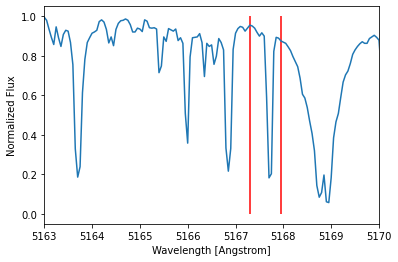

In [28]:
plt.plot(spec["col1"], spec["col2"])
plt.vlines(5167.3, 0, 1, color="red")
plt.vlines(5167.95, 0, 1, color="red")
plt.xlim(5163, 5170)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

In [29]:
# This is the FeI emission for 5166.3 according to the solar survey archive
# All of the values in his file seem slightly shifted to the right

#Picked width values
wval1 = 5167.3
wval2 = 5167.95

In [30]:
ind = np.where((spec["col1"] < wval2) & (spec["col1"] > wval1))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1 - spec["col2"][ind]) * inc 
print("Equivalent width (ew) = ", ew, " Angstrom")

equivalent width (ew) =  0.15267944786179077  Angstrom


In [31]:
# Log value with the ew divided by the wavelength of the line
np.log10(0.1526 / 5166.3)

-4.529625087839355


<img src="http://spiff.rit.edu/classes/phys440/lectures/curve/gcurve.jpg" width="600 pt">

In [42]:
#With a log on the y-axis of -4.52, we get a value on the x-axis approximately 13.5

# According to the solar survey Archive, the oscillator strength is
f = 0.00000709

N = 10**13.4 / f / (5166.3 / 5000) 
# N = 3.43 * 10^18

N1 = 3.43*10**18

3.4288157428492267


 [Site for transmission](https://physics.nist.gov/cgi-bin/ASD/lines1.pl?spectra=Na&limits_type=0&low_w=588.9&upp_w=589.1&unit=1&submit=Retrieve+Data&de=0&format=0&line_out=0&en_unit=0&output=0&bibrefs=1&page_size=15&show_obs_wl=1&show_calc_wl=1&unc_out=1&order_out=0&max_low_enrg=&show_av=2&max_upp_enrg=&tsb_value=0&min_str=&A_out=0&intens_out=on&max_str=&allowed_out=1&forbid_out=1&min_accur=&min_intens=&conf_out=on&term_out=on&enrg_out=on&J_out=on)

### 1. Ratio of ground state to excited state Fe atoms $\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$

In [47]:
# The transition for this line is a 4p to 4s

# Constants
h = 6.626 * 10 ** (-34)
c = 3 * 10 ** 8
k = 1.38 * 10 ** (-23)
T = 5770

# Calculation

N2_N1 = 3 * np.exp(- h * c / 5166.3 * 10 ** 10 / (k * T))  ## Boltzmann Equation
print('Ratio of Fe atoms in excited to ground state:', N2_N1)

Ratio of Fe atoms in excited to ground state: 0.02390870247135607


In [54]:
# Number density of neutral Fe atoms

Neutral_N = N2_N1 * N1 + N1

print('Number density of neutral Fe atoms:', Neutral_N)

Number density of neutral Fe atoms: 3.5120068494767514e+18


## 2. Ratio of neutral to ionized Fe atoms $\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$,  


In [55]:
# Ionization energy for Fe is 7.9024
# Constants

# Have not been able to find the partition function values for Fe
    # (assuming they are different) so plugging in the given Z values
ZI = 2.4
ZII = 1
Me = 9.1 * 10 ** (-31)
# Ionization energy for Fe is 7.9024
Chi = 7.9024

# Calculation
FeII_FeI = 2 * k * T * 1 / (2.4) * ((2 * np.pi * Me * k * T
                                            / (h) ** 2)) ** (3/2) * np.exp(- Chi * 1.6 * 10 ** (-19) / (k * T))  ## Saha Equation
print('Ionized to Neutral Fe ratio:', FeII_FeI)

Ionized to Neutral Fe ratio: 8.899314274298392


In [56]:
# Number density of Ionized Fe

Ion_N = FeII_FeI * Neutral_N

print('Number density of Ionized Fe:', Ion_N)

Number density of Ionized Fe: 3.125445268698218e+19


## 3. Total column density of Fe atoms $N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}})$

In [50]:
#Total number
N_tot = N1 * (1 + N2_N1) * (1 + FeII_FeI)
print('Total Fe atoms:', N_tot)

Total Fe atoms: 3.4766459536458932e+19


## 4. Fe abundance relative to hydrogen

In [57]:
#Finding the Fe abundance in the sun relative to Hydrogen
ratio_part = N_tot / (6.6 * 10 ** 23)
Fe_ab = 12 + np.log10(ratio_part)
print('Fe Abundance:', Fe_ab)
print('Official value for Sun:', 7.5)

Fe Abundance: 7.721616530750593
Official value for Sun: 7.5


In [61]:
# Other ways of describing this relative abundance

# At least according to the example notebook

ratio_ph_sun = 10**(7.5 - 12)

print(np.log10(ratio_part / ratio_ph_sun))

print((ratio_ph_sun - ratio_part)/ ratio_ph_sun * 100)

0.22161653075059268
-66.57757320498787
